# SPARK Data Preprocessing Pipe

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from sklearn.metrics import balanced_accuracy_score
from xgboost import XGBClassifier
#from tpot import TPOTClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
label_mapping = {0: "Healthy", 1: "Parkinson's", 2: "Other Movement Disorder"}

In [7]:
df = pd.read_csv('../processed_data/merged_dfq.csv')

In [8]:
df = df.drop(columns = 'Unnamed: 0')

In [9]:
df.shape
df.columns
df.resource_type.unique()

array(['patient'], dtype=object)

In [10]:
data_clean = df.copy()
data_clean.columns

Index(['subject_id', 'study_id_x', 'questionnaire_name', 'questionnaire_id',
       '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', 'resource_type', 'id', 'study_id_y',
       'condition', 'disease_comment', 'age_at_diagnosis', 'age', 'height',
       'weight', 'gender', 'handedness', 'appearance_in_kinship',
       'appearance_in_first_grade_kinship', 'effect_of_alcohol_on_tremor',
       'label'],
      dtype='object')

In [11]:
columns_to_drop = ['study_id_x', 'study_id_y',
                   'questionnaire_id', 'id',
                    'questionnaire_name', 'resource_type',
                    'appearance_in_first_grade_kinship',
                   'disease_comment', 'condition', 'effect_of_alcohol_on_tremor']

In [12]:
data_clean = data_clean.drop(columns= columns_to_drop)
data_clean

subject_id     01     02     03     04     05     06     07     08  \
0           280  False  False   True  False   True  False   True   True   
1           146  False   True  False  False  False  False  False   True   
2           453  False  False  False  False  False  False  False  False   
3             3  False  False  False  False  False  False  False  False   
4           392   True  False   True  False  False  False  False   True   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
464         169  False  False  False  False   True  False  False   True   
465         186   True  False   True   True   True  False  False   True   
466         352  False   True   True  False  False  False  False   True   
467         217   True  False  False  False  False  False  False   True   
468          94   True  False  False  False  False  False   True   True   

        09  ...     29     30  age_at_diagnosis  age  height  weight  gender  \
0    False  ...  False  False                73   77     162      65  female   
1     True  ...  False  False                68   71     186      89    male   
2    False  ...  False  False                 0   48     164      59  female   
3    False  ...  False  False                45   45     170      78  female   
4    False  ...  False  False                48   55     165      64  female   
..     ...  ...    ...    ...               ...  ...     ...     ...     ...   
464   True  ...  False  False                51   56     180      82  female   
465   True  ...   True   True                60   65     160      73  female   
466   True  ...  False  False                45   55     172      80  female   
467   True  ...  False  False                65   73     182      85    male   
468   True  ...  False  False                67   69     186      91    male   

     handedness  appearance_in_kinship  label  
0         right                  False      2  
1         right                   True      1  
2         right                  False      2  
3         right                  False      0  
4         right                  False      1  
..          ...                    ...    ...  
464       right                   True      1  
465       right                  False      1  
466       right                   True      1  
467       right                  False      1  
468       right                   True      1  

[469 rows x 39 columns]

subject_id     01     02     03     04     05     06     07     08  \
2           453  False  False  False  False  False  False  False  False   
94          242  False   True  False  False  False  False  False   True   
135         434  False  False  False  False  False  False  False  False   
142         176  False  False  False   True  False  False  False  False   
155         117  False   True  False  False  False  False  False   True   
174         195  False  False  False  False  False  False  False  False   
222         462  False  False  False  False  False  False  False  False   
228         120  False  False  False  False   True   True   True  False   
238         321  False  False  False  False  False  False  False  False   
266         322  False   True   True  False   True  False   True  False   
274         178  False  False  False   True  False  False  False   True   
276         314  False   True   True  False  False  False  False  False   
396          37  False  False  False  False  False  False  False   True   
414         260  False   True  False  False   True  False   True   True   
416         237  False  False  False  False  False  False  False  False   
427         348   True  False  False  False   True  False  False   True   
435          98  False  False  False  False  False  False  False  False   
440         450  False  False   True  False  False  False  False  False   
455         344   True   True   True  False   True   True   True  False   

        09  ...     29     30  age_at_diagnosis  age  height  weight  gender  \
2    False  ...  False  False                 0   48     164      59  female   
94    True  ...  False  False                 0   59     175     105    male   
135  False  ...  False  False                 0   75     162      52  female   
142   True  ...  False  False                 0   43     168     110  female   
155   True  ...  False  False                 0   82     172      76    male   
174  False  ...   True  False                 0   57     182      87    male   
222  False  ...  False  False                 0   58     160      75  female   
228  False  ...  False  False                 0   67     175      75    male   
238   True  ...  False  False                 0   66     162      62  female   
266   True  ...  False   True                 0   59     184      98    male   
274  False  ...  False  False                 0   41     174      66  female   
276   True  ...  False  False                 0   52     176      80    male   
396  False  ...  False  False                 0   70     171      78    male   
414   True  ...  False  False                 0   68     178      90    male   
416   True  ...  False  False                 0   60     168      70  female   
427  False  ...  False  False                 0   67     180      83    male   
435  False  ...  False  False                 0   59     192     115    male   
440  False  ...  False  False                 0   59     186      83    male   
455  False  ...   True  False                 0   75     194      87    male   

     handedness  appearance_in_kinship  label  
2         right                  False      2  
94        right                  False      1  
135       right                  False      2  
142       right                  False      2  
155       right                  False      2  
174       right                  False      2  
222       right                  False      2  
228       right                  False      1  
238       right                  False      2  
266       right                  False      1  
274        left                   True      2  
276       right                   True      2  
396       right                  False      2  
414       right                  False      1  
416       right                  False      1  
427       right                  False      1  
435       right                  False      2  
440       right                  False 

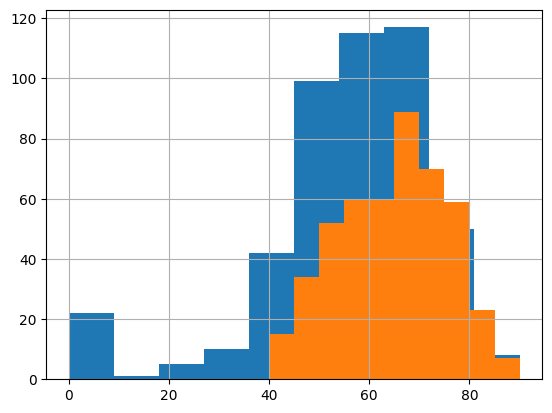

In [13]:
data_clean.age_at_diagnosis.hist()
data_clean.age.hist()
#data_clean[data_clean['age_at_diagnosis']==0,]
data_clean[data_clean['age_at_diagnosis']==0]

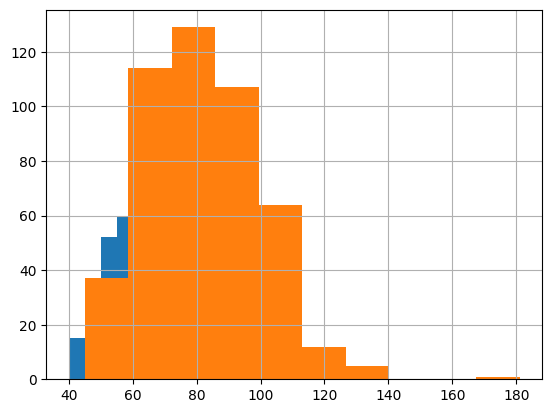

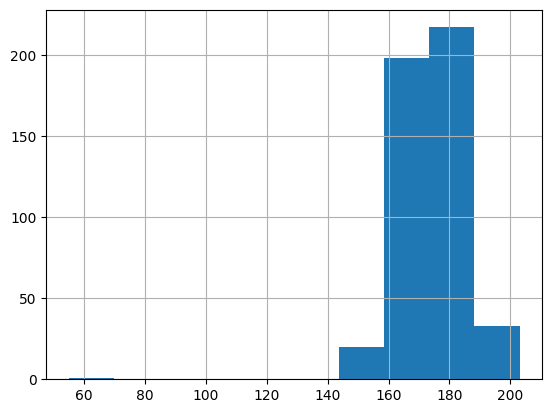

<Figure size 640x480 with 0 Axes>

In [14]:
data_clean.age.hist()
data_clean.weight.hist()
plt.show()
data_clean.height.hist(bins = 10)
plt.show()
plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  469 non-null    int64
 1   height  469 non-null    int64
dtypes: int64(2)
memory usage: 7.5 KB


<Axes: >

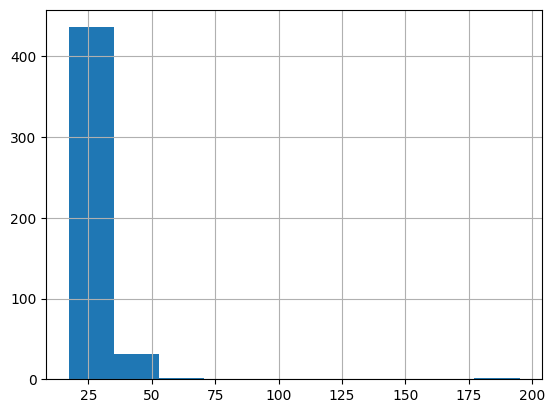

In [15]:
#Feature engineering
#BMI weight (kg) / [height (m)]²
data_clean['bmi'] = (data_clean.weight)/((data_clean.height/100)**2)
data_clean.loc[:,['weight', 'height']].info()
data_clean.bmi.hist()

In [16]:
mask = data_clean['age_at_diagnosis']==0
data_clean.loc[mask,'age_at_diagnosis'] = data_clean.loc[mask,'age']

In [17]:
features = data_clean.drop(columns = ['subject_id','label']).columns
features
y = data_clean['label']

In [18]:
data_clean['strat'] =  data_clean['gender']+data_clean['label'].astype(str)
data_clean.head()
data_clean['strat'].value_counts()

strat
male1      195
female1     81
female2     57
male2       57
female0     50
male0       29
Name: count, dtype: int64

<Axes: >

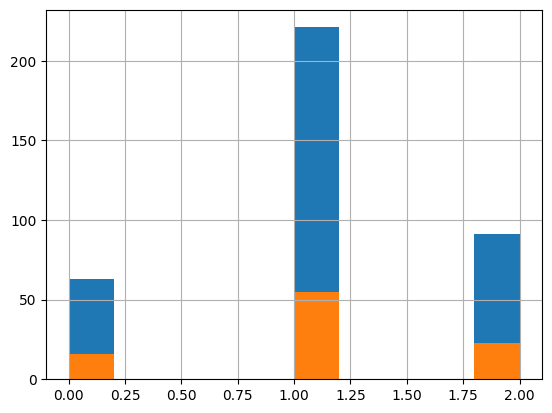

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    data_clean[features], y, test_size=0.20, random_state=42, stratify = data_clean['strat'])
y_train.hist()
y_test.hist()

In [66]:
X_train.shape
X_train.columns = features
X_train.head()

01     02     03     04     05     06     07     08     09     10  \
294  False  False   True  False  False  False  False   True   True  False   
267   True   True  False  False  False  False  False   True   True  False   
1    False   True  False  False  False  False  False   True   True  False   
69   False  False  False   True   True  False  False   True   True   True   
179  False  False  False  False  False  False  False  False  False  False   

     ...     29     30  age_at_diagnosis  age  height  weight  gender  \
294  ...  False  False                81   81     184      84    male   
267  ...  False  False                52   62     175     127    male   
1    ...  False  False                68   71     186      89    male   
69   ...  False  False                51   51     160      79  female   
179  ...  False  False                71   71     165      92  female   

     handedness  appearance_in_kinship        bmi  
294       right                  False  24.810964  
267       right                   True  41.469388  
1         right                   True  25.725517  
69        right                  False  30.859375  
179       right                  False  33.792470  

[5 rows x 38 columns]

In [67]:
encoder = OneHotEncoder(drop = 'if_binary')
r_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

In [68]:
data_to_rscale = ['age_at_diagnosis', 'age', 'height', 'weight']
data_to_mmscale = ['bmi']
data_to_encode = data_clean.drop(columns = ['age_at_diagnosis', 'age',
                                            'height', 'weight','bmi','subject_id','label','strat']).columns
column_prep = ColumnTransformer(transformers=[
        ("robust", r_scaler, data_to_rscale),
        ("mm", mm_scaler, data_to_mmscale),
        ("enc",encoder, data_to_encode)
    ])

X_train_prep= column_prep.fit_transform(X_train[features])
X_test_prep  = column_prep.transform(X_test[features])

In [100]:
pd.DataFrame(X_train_prep)

0       1     2         3         4    5    6    7    8    9   ...  \
0    1.4375  1.0000  0.72  0.086957  0.240233  0.0  0.0  1.0  0.0  0.0  ...   
1   -0.3750 -0.1875  0.00  1.956522  0.789707  1.0  1.0  0.0  0.0  0.0  ...   
2    0.6250  0.3750  0.88  0.304348  0.270399  0.0  1.0  0.0  0.0  0.0  ...   
3   -0.4375 -0.8750 -1.20 -0.130435  0.439738  0.0  0.0  0.0  1.0  1.0  ...   
4    0.8125  0.3750 -0.80  0.434783  0.536486  0.0  0.0  0.0  0.0  0.0  ...   
..      ...     ...   ...       ...       ...  ...  ...  ...  ...  ...  ...   
370 -1.3125 -0.2500  0.56  0.043478  0.248360  0.0  1.0  0.0  1.0  1.0  ...   
371 -0.1250 -0.0625  1.36  0.695652  0.298723  1.0  0.0  1.0  0.0  1.0  ...   
372  0.8750  1.1250 -0.80 -0.869565  0.173017  0.0  0.0  0.0  1.0  0.0  ...   
373  0.3750  0.2500  1.28  0.434783  0.253679  0.0  1.0  0.0  0.0  0.0  ...   
374 -0.2500 -0.5625 -0.08  0.565217  0.456845  1.0  1.0  1.0  0.0  1.0  ...   

      28   29   30   31   32   33   34   35   36   37  
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  
1    0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4    0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
370  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  
371  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  
372  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
373  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  
374  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  

[375 rows x 38 columns]

In [284]:
cat_model = CatBoostClassifier(iterations = 2000, learning_rate = 0.05,depth = 7)

In [285]:
model.fit(X_train_prep,y_train, eval_set = (X_test_prep, y_test), use_best_model = True)

0:	learn: 1.0777608	test: 1.0805594	best: 1.0805594 (0)	total: 3.44ms	remaining: 6.87s
1:	learn: 1.0625429	test: 1.0722085	best: 1.0722085 (1)	total: 9.55ms	remaining: 9.54s
2:	learn: 1.0452779	test: 1.0609398	best: 1.0609398 (2)	total: 14.8ms	remaining: 9.85s
3:	learn: 1.0290172	test: 1.0498771	best: 1.0498771 (3)	total: 19.3ms	remaining: 9.61s
4:	learn: 1.0142319	test: 1.0417463	best: 1.0417463 (4)	total: 23.5ms	remaining: 9.38s
5:	learn: 0.9972869	test: 1.0289803	best: 1.0289803 (5)	total: 27.5ms	remaining: 9.14s
6:	learn: 0.9847817	test: 1.0211008	best: 1.0211008 (6)	total: 31.6ms	remaining: 9s
7:	learn: 0.9735581	test: 1.0158628	best: 1.0158628 (7)	total: 35.7ms	remaining: 8.89s
8:	learn: 0.9615142	test: 1.0090642	best: 1.0090642 (8)	total: 40.4ms	remaining: 8.94s
9:	learn: 0.9502863	test: 1.0012164	best: 1.0012164 (9)	total: 44.5ms	remaining: 8.86s
10:	learn: 0.9397830	test: 0.9963642	best: 0.9963642 (10)	total: 48.5ms	remaining: 8.78s
11:	learn: 0.9286940	test: 0.9894771	best: 0

In [286]:
y_pred = model.predict(X_test_prep)
cat_accuracy = balanced_accuracy_score(y_test,y_pred)

In [287]:
f'balanced accuracy score cat: {cat_accuracy}'

'balanced accuracy score cat: 0.6312747035573122'

In [246]:
#tpot = TPOTClassifier(generations=50, population_size=100, scorers='balanced_accuracy', random_state=42, n_jobs = 4, max_time_mins=30)

In [245]:
#tpot.fit(X_train_prep, y_train)

In [ ]:
#tpot_pred = tpot.predict(X_test_prep)

In [244]:
#tpot_accuracy = balanced_accuracy_score(tpot_pred,y_test)

In [243]:
#f'tpot balanced accuracy score: {tpot_accuracy}'

In [ ]:
param_grid= { 'iterations': [100, 200, 1000],
              'learning_rate': [0.01, 0.10, 0.20],
                'depth': [4,6,8,10],
                'l2_leaf_reg':[0.01, 0.05, 0.10, 0.15]
                }

In [230]:
cat_search = GridSearchCV(cat_model,param_grid, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), n_jobs = -1, verbose = 1)

In [231]:
cat_search.fit(X_test_prep, y_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 1.0921922	total: 54.8ms	remaining: 5.42s
0:	learn: 1.0897176	total: 58.2ms	remaining: 5.76s
0:	learn: 1.0915159	total: 56.7ms	remaining: 5.61s
1:	learn: 1.0862890	total: 56.5ms	remaining: 2.77s
0:	learn: 1.0308957	total: 57.8ms	remaining: 5.72s
0:	learn: 1.0366313	total: 57ms	remaining: 5.64s
1:	learn: 1.0837311	total: 60.5ms	remaining: 2.96s
1:	learn: 1.0852757	total: 58.8ms	remaining: 2.88s
1:	learn: 0.9774878	total: 59.3ms	remaining: 2.9s
1:	learn: 0.9802626	total: 60.1ms	remaining: 2.95s
2:	learn: 1.0823861	total: 59.2ms	remaining: 1.91s
2:	learn: 1.0809974	total: 60.8ms	remaining: 1.96s
2:	learn: 1.0801169	total: 62.9ms	remaining: 2.03s
0:	learn: 1.0137661	total: 57.5ms	remaining: 5.69s
3:	learn: 1.0744725	total: 62.1ms	remaining: 1.49s
0:	learn: 1.0886073	total: 59.1ms	remaining: 5.85s
3:	learn: 1.0774825	total: 61.2ms	remaining: 1.47s
2:	learn: 0.9502996	total: 62.4ms	remaining: 2.02s
4:	learn: 1.0676647	tot

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x32d8f7280>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 200],
                         'l2_leaf_reg': [0.01, 0.05, 0.1, 0.15],
                         'learning_rate': [0.01, 0.1, 0.2]},
             verbose=1)

In [255]:
tuned_cat = cat_search.best_estimator_
tuned_cat.get_params()

{'iterations': 200, 'learning_rate': 0.01, 'depth': 10, 'l2_leaf_reg': 0.05}

In [288]:
tuned_cat.fit(X_train_prep,y_train, eval_set = (X_test_prep, y_test), use_best_model = True)

0:	learn: 1.0916000	test: 1.0920981	best: 1.0920981 (0)	total: 3.25ms	remaining: 647ms
1:	learn: 1.0811396	test: 1.0904341	best: 1.0904341 (1)	total: 36.8ms	remaining: 3.64s
2:	learn: 1.0698624	test: 1.0869611	best: 1.0869611 (2)	total: 64.8ms	remaining: 4.25s
3:	learn: 1.0582322	test: 1.0842971	best: 1.0842971 (3)	total: 95.4ms	remaining: 4.67s
4:	learn: 1.0507661	test: 1.0807718	best: 1.0807718 (4)	total: 103ms	remaining: 4.01s
5:	learn: 1.0399495	test: 1.0769850	best: 1.0769850 (5)	total: 131ms	remaining: 4.24s
6:	learn: 1.0295382	test: 1.0739759	best: 1.0739759 (6)	total: 159ms	remaining: 4.38s
7:	learn: 1.0202534	test: 1.0700832	best: 1.0700832 (7)	total: 187ms	remaining: 4.5s
8:	learn: 1.0146101	test: 1.0657186	best: 1.0657186 (8)	total: 195ms	remaining: 4.14s
9:	learn: 1.0050163	test: 1.0636713	best: 1.0636713 (9)	total: 223ms	remaining: 4.25s
10:	learn: 0.9963642	test: 1.0610872	best: 1.0610872 (10)	total: 252ms	remaining: 4.32s
11:	learn: 0.9863713	test: 1.0580806	best: 1.0580

In [289]:
y_pred_tuned = tuned_cat.predict(X_test_prep)

In [290]:
tuned_cat_accuracy = balanced_accuracy_score(y_test,y_pred_tuned)

In [296]:
f'balanced accuracy score cat tuned: {tuned_cat_accuracy}'

'balanced accuracy score cat tuned: 0.5606225296442687'

In [298]:
test_cat = CatBoostClassifier(iterations = 200, learning_rate = 0.01,depth = 10, l2_leaf_reg =  0.05, use_best_model = True)

In [299]:
test_cat.fit(X_train_prep,y_train, eval_set = (X_test_prep, y_test))

0:	learn: 1.0916000	test: 1.0920981	best: 1.0920981 (0)	total: 3.67ms	remaining: 730ms
1:	learn: 1.0811396	test: 1.0904341	best: 1.0904341 (1)	total: 38.4ms	remaining: 3.8s
2:	learn: 1.0698624	test: 1.0869611	best: 1.0869611 (2)	total: 66.3ms	remaining: 4.35s
3:	learn: 1.0582322	test: 1.0842971	best: 1.0842971 (3)	total: 94.4ms	remaining: 4.63s
4:	learn: 1.0507661	test: 1.0807718	best: 1.0807718 (4)	total: 102ms	remaining: 3.98s
5:	learn: 1.0399495	test: 1.0769850	best: 1.0769850 (5)	total: 130ms	remaining: 4.2s
6:	learn: 1.0295382	test: 1.0739759	best: 1.0739759 (6)	total: 158ms	remaining: 4.34s
7:	learn: 1.0202534	test: 1.0700832	best: 1.0700832 (7)	total: 185ms	remaining: 4.45s
8:	learn: 1.0146101	test: 1.0657186	best: 1.0657186 (8)	total: 193ms	remaining: 4.09s
9:	learn: 1.0050163	test: 1.0636713	best: 1.0636713 (9)	total: 221ms	remaining: 4.2s
10:	learn: 0.9963642	test: 1.0610872	best: 1.0610872 (10)	total: 249ms	remaining: 4.28s
11:	learn: 0.9863713	test: 1.0580806	best: 1.058080

In [303]:
y_pred_test_cat = test_cat.predict(X_test_prep)

In [304]:
test_cat_accuracy = balanced_accuracy_score(y_test,y_pred_test_cat)
f'balanced accuracy score cat test: {test_cat_accuracy}'

'balanced accuracy score cat test: 0.5606225296442687'

In [314]:
boost_model = XGBClassifier(n_estimators=10, max_depth=3, learning_rate=0.05, objective='multi:softprob', tree_method='hist', eta=0.1)

In [315]:
boost_model.fit(X_train_prep,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None, ...)

In [316]:
y_pred_boost = boost_model.predict(X_test_prep)

In [319]:
balanced_accuracy_score(y_test, y_pred_boost)

0.5838274044795785

In [323]:
model_svc_yul = SVC(kernel='linear', C=1)

In [324]:
model_svc_yul.fit(X_train_prep, y_train)

SVC(C=1, kernel='linear')

In [325]:
y_pred_yul = model_svc_yul.predict(X_test_prep)

In [328]:
accuracy_yul = balanced_accuracy_score(y_test,y_pred_yul)
f'balanced accuracy score model by yuling: {accuracy_yul}'

'balanced accuracy score model by yuling: 0.6513504611330699'

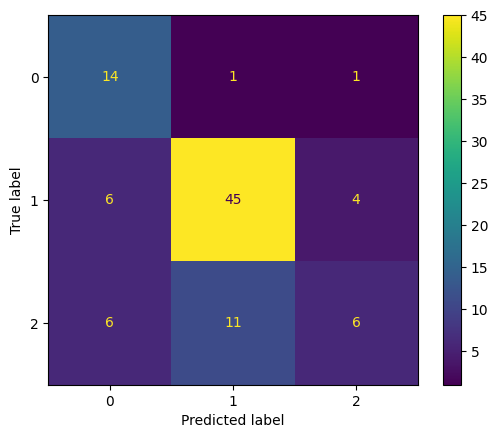

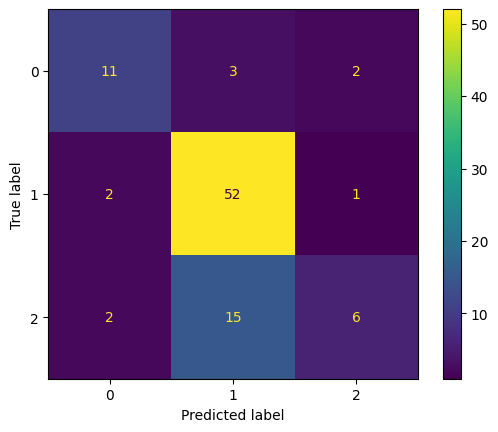

In [331]:
cm_svc = confusion_matrix(y_test,y_pred_yul)
disp_cm_svc  = ConfusionMatrixDisplay(cm_svc)
disp_cm_svc.plot();

cm_cat = confusion_matrix(y_test,y_pred)
disp_cm_cat  = ConfusionMatrixDisplay(cm_cat)
disp_cm_cat.plot();